# Case studies

## Gold standard

This dataset contains the 50 most recent articles from [arxiv.org in both the cs.LG and stat.ML categories](https://arxiv.org/list/cs.LG/recent), between the dates 2022-10-24 and 2022-10-25 which had 570 search results. We select articles that belong to cs.LG `or` (cs.LG `and` stat.ML) category. 

"Repository evaluation" is performed on articles that provided links to their code repository and "Paper evaluation" is performed on all 50 articles by parsing the `.tex` files from their corresponding arXiv links. `reproscreener` is evaluated this `gold_standard` dataset and the results are shown below.

In [13]:
import pandas as pd
import numpy as np
from IPython.display import display
from pathlib import Path
import sys
import seaborn as sns
from matplotlib import pyplot as plt
sys.path.append(str(Path.cwd().parent / "src/reproscrener"))

from reproscreener.plots.repo_eval_heatmaps import prepare_repo_heatmap_df, plot_repo_heatmap, plot_repo_clustermap
from reproscreener.plots.tex_eval_heatmaps import prepare_tex_heatmap_df, plot_tex_heatmap
from reproscreener.repo_eval import get_all_repo_eval_dict
from reproscreener.tex_eval import get_all_tex_eval_dict
from reproscreener.gold_standard import get_gold_standard_ids_from_manual
from reproscreener.utils import reverse_mapping

def summary_table(df, column, number_of_papers):
    variable_counts = df[column].value_counts()
    percentage = variable_counts / number_of_papers * 100

    summary_table = pd.DataFrame({"Count": variable_counts, "Percentage": percentage})
    summary_table = summary_table.sort_values(by="Count", ascending=False)
    summary_table["Percentage"] = summary_table["Percentage"].map("{:.2f}%".format)
    return summary_table

In [14]:
path_repo = Path("../case-studies/arxiv-corpus/gold_standard/repo")
path_tex = Path("../case-studies/arxiv-corpus/gold_standard/source")
path_manual = Path("../case-studies/arxiv-corpus/manual_eval.csv")
gold_standard_ids = get_gold_standard_ids_from_manual(path_manual)

Manual eval file already exists, use the overwrite flag to download

## Repo evaluation

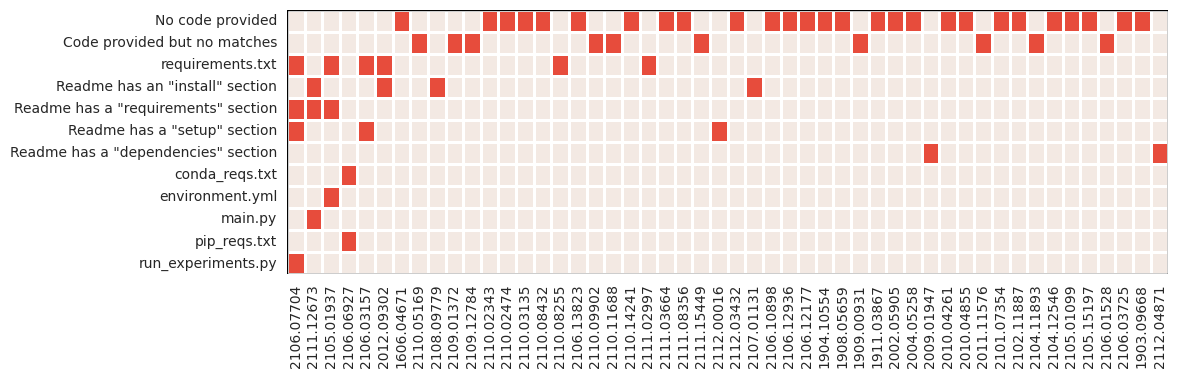

In [15]:
repo_evaluation_dict = get_all_repo_eval_dict(path_repo)
repo_heatmap_df = prepare_repo_heatmap_df(repo_evaluation_dict, gold_standard_ids)
plot_repo_heatmap(repo_heatmap_df, filename="heatmap_repo_eval.png", path_plots=None, sort_x=True, sort_y=True)

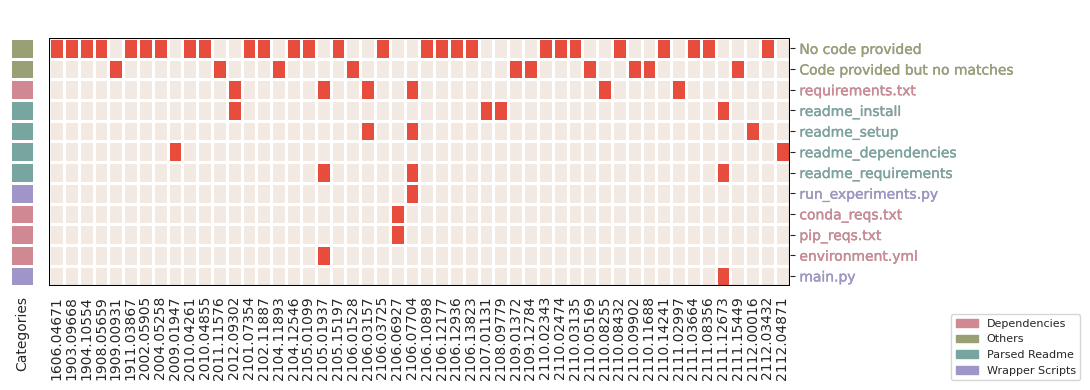

In [16]:
plot_repo_clustermap(repo_heatmap_df, filename="clustermap_repo_eval.png", path_plots=None)

In [17]:
repo_heatmap_df.head(10).drop(columns=["Display_Label"])

,Paper_ID,Matched_File,Category
0,1606.04671,No code provided,Others
1,1903.09668,No code provided,Others
2,1904.10554,No code provided,Others
3,1908.05659,No code provided,Others
4,1909.00931,Code provided but no matches,Others
5,1911.03867,No code provided,Others
6,2002.05905,No code provided,Others
7,2004.05258,No code provided,Others
8,2009.01947,readme_dependencies,Parsed Readme
9,2010.04261,No code provided,Others


In [18]:
number_of_papers = len(repo_heatmap_df["Paper_ID"].unique())
print(f"Total number of papers in the gold standard: {len(gold_standard_ids)}")

Total number of papers in the gold standard: 50


In [19]:
summary_table(repo_heatmap_df, "Matched_File", number_of_papers)

,Count,Percentage
No code provided,27,54.00%
Code provided but no matches,10,20.00%
requirements.txt,6,12.00%
readme_install,4,8.00%
readme_requirements,3,6.00%
readme_setup,3,6.00%
readme_dependencies,2,4.00%
environment.yml,1,2.00%
conda_reqs.txt,1,2.00%
pip_reqs.txt,1,2.00%


The variables are grouped by the following categories defined in `reverse_mapping`:

- **Dependencies**: Files related to the dependencies of the repository.
- **Wrapper Scripts**: Files that combine various stages of the workflow.
- **Parsed Readme**: Headers present in the README file of the repository that provide instructions about the code/data.
- **Others**: Contains `No code provided` or `Code provided but no matches`. The latter is used when the code is provided but files from any of the other categories were found in the repository.

In [20]:
reverse_mapping_df = pd.DataFrame.from_dict(reverse_mapping, orient='index', columns=['Category'])
reverse_mapping_df.index.name = 'Matched_File'
reverse_mapping_df

,Category
Matched_File,
requirements.txt,Dependencies
setup.py,Dependencies
environment.yml,Dependencies
pyproject.toml,Dependencies
pip_reqs.txt,Dependencies
conda_reqs.txt,Dependencies
run.py,Wrapper Scripts
run.sh,Wrapper Scripts
main.py,Wrapper Scripts


In [21]:
summary_table(repo_heatmap_df, "Category", number_of_papers)

,Count,Percentage
Others,37,74.00%
Parsed Readme,12,24.00%
Dependencies,9,18.00%
Wrapper Scripts,2,4.00%


In [22]:
no_code_provided_counts = len(repo_heatmap_df[repo_heatmap_df["Matched_File"] == "No code provided"])
code_provided_counts = number_of_papers - no_code_provided_counts
code_provided_percentage = (code_provided_counts / number_of_papers) * 100
print(f"{code_provided_counts}/{number_of_papers} ({code_provided_percentage:.2f}%) of the papers have provided some code")

23/50 (46.00%) of the papers have provided some code


## Tex Evaluation

In [23]:
tex_evaluation_dict = get_all_tex_eval_dict(path_tex)
tex_heatmap_df = prepare_tex_heatmap_df(tex_evaluation_dict, gold_standard_ids)

Output()

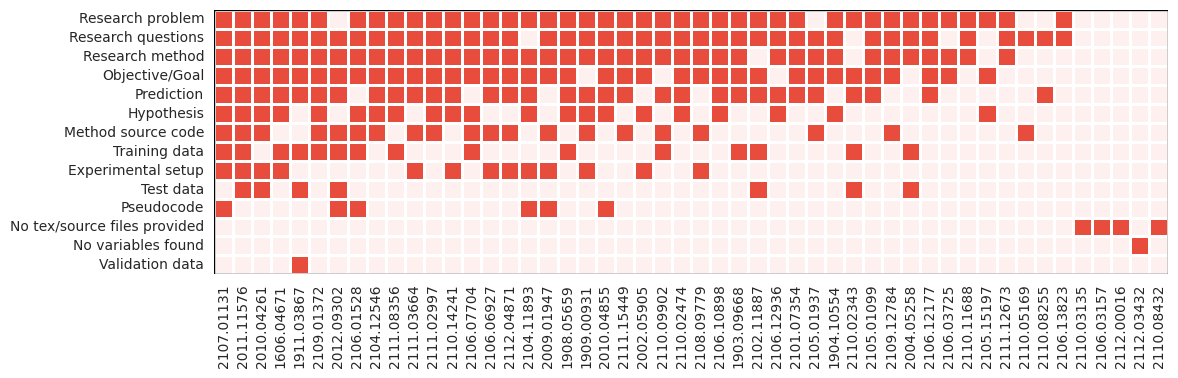

In [24]:
plot_tex_heatmap(tex_heatmap_df, filename="heatmap_tex_eval.png", path_plots=None, sort_x=True, sort_y=True)

In [25]:
tex_heatmap_df.head(10)

,Paper_ID,Found_Variable
0,1606.04671,Hypothesis
1,1606.04671,Research problem
2,1606.04671,Training data
3,1606.04671,Prediction
4,1606.04671,Research method
5,1606.04671,Objective/Goal
6,1606.04671,Experimental setup
7,1606.04671,Research questions
8,1903.09668,Research problem
9,1903.09668,Training data


In [26]:
summary_table(tex_heatmap_df, "Found_Variable", number_of_papers)

,Count,Percentage
Research problem,41,82.00%
Research questions,41,82.00%
Research method,39,78.00%
Objective/Goal,36,72.00%
Prediction,31,62.00%
Hypothesis,21,42.00%
Method source code,20,40.00%
Training data,15,30.00%
Experimental setup,13,26.00%
Test data,7,14.00%
